<a href="https://colab.research.google.com/github/lucynjora/python.codes/blob/main/lucynjora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np

import sklearn.linear_model as lm
import LinearRegression
from numpy.lib.arraysetops import unique

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import joblib
import pickle

mydata = pd.read_csv('/content/drive/MyDrive/severity.dataset.csv')
mydata.head()

,Human_factor,Weather_Conditions
0,1,2
1,1,1
2,1,1
3,1,1
4,1,1


In [14]:
!pip install LinearRegression

In [31]:
dublicates_cas = mydata[mydata['Human_factor'].duplicated()]
duplicates_cap = mydata[mydata['Weather_Conditions'].duplicated()]
print(dublicates_cas)
print(duplicates_cap)

         Human_factor  Weather_Conditions
1                   1                   1
2                   1                   1
3                   1                   1
4                   1                   1
5                   1                   2
...               ...                 ...
1048570             2                   1
1048571             1                   1
1048572             1                   1
1048573             1                   1
1048574             1                   3

[1048534 rows x 2 columns]
         Human_factor  Weather_Conditions
2                   1                   1
3                   1                   1
4                   1                   1
5                   1                   2
6                   1                   1
...               ...                 ...
1048570             2                   1
1048571             1                   1
1048572             1                   1
1048573             1                   1
104857

In [26]:
unique_values = mydata.value_counts()
print(unique)

<function unique at 0x7d71b9b656c0>


In [ ]:
null = mydata.isnull().sum()
print(null)

In [ ]:
mydata['Engine_Capacity'].replace(-1,400)

In [ ]:
summary = mydata.describe()
print(mydata.info())
print(summary)

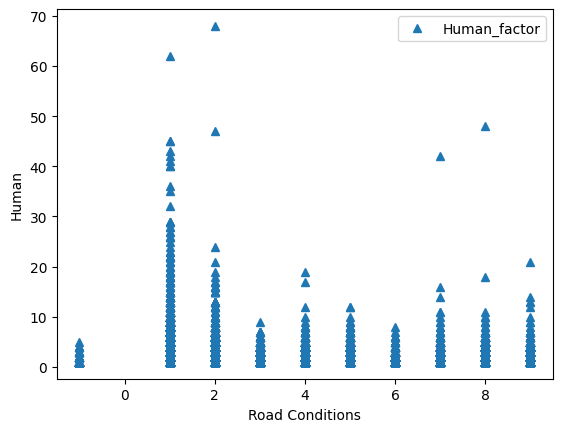

In [45]:
variables = mydata.loc[:,['Weather_Conditions','Human_factor']]
mydata.plot(x='Weather_Conditions', y='Human_factor', style='^')
plt.xlabel('Road Conditions')
plt.ylabel('Human')
plt.show()

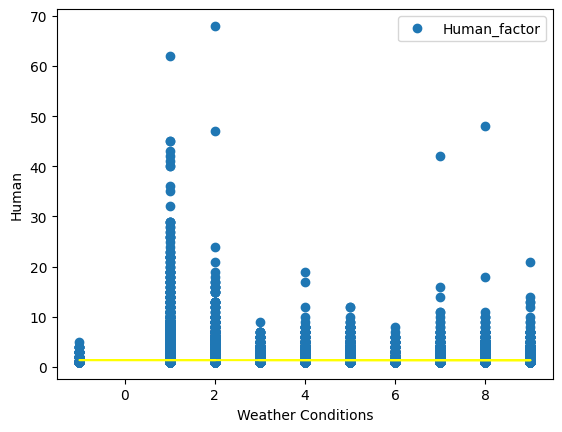

In [44]:
regressor = lm.LinearRegression()
x = mydata[['Weather_Conditions']]y = mydata[['Human_factor']]
regressor.fit(x,y)
y_pred = regressor.predict(x)
mydata.plot(x = 'Weather_Conditions', y='Human_factor', style='o')
plt.plot(x, regressor.predict(x), color= 'yellow', label = 'Regression line')
plt.xlabel('Weather Conditions')
plt.ylabel('Human')
plt.show()

In [34]:
x = pd.DataFrame(mydata['Weather_Conditions'])
x = pd.DataFrame(mydata['Human_factor'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
regressor = lm.LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
y_test

,Human_factor
1045953,1
358409,1
875012,1
555046,1
272972,1
...,...
181305,1
672605,1
718823,1
1006146,2


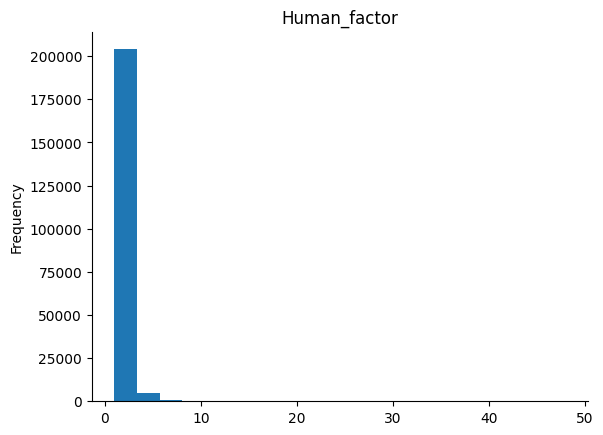

In [36]:
from matplotlib import pyplot as plt
y_test['Human_factor'].plot(kind='hist', bins=20, title='Human_factor')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [37]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)

MAE 5.171246953791314e-16
MSE 4.243811368371754e-31
RMSE 6.514454212266561e-16


In [39]:
model = lm.LinearRegression()
model.fit(x,y)
joblib.dump(model, 'work.pkl')
with open('work.pkl', 'wb') as file:
  pickle.dump(model, file)

In [40]:
new_x = np.array([10, 20, 30]).reshape(-1, 1)
model = joblib.load('work.pkl')
predictions = model.predict(new_x)
new_data = pd.DataFrame({'x': new_x.flatten(), 'Predicted_y': predictions.flatten()})
print(new_data)

    x  Predicted_y
0  10         10.0
1  20         20.0
2  30         30.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
